# Demographic Data Analyzer


This project was created as part of the course on the free Code Camp website:

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer

On this project I had to analyze demographic data using pandas. I got a dataset of demographic data, that was extracted from the 1994 Census database.



In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px




In [5]:
# import dataset
df=pd.read_csv("/adult.data.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 1 How many of each race are represented in this dataset?

In [9]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<Axes: >

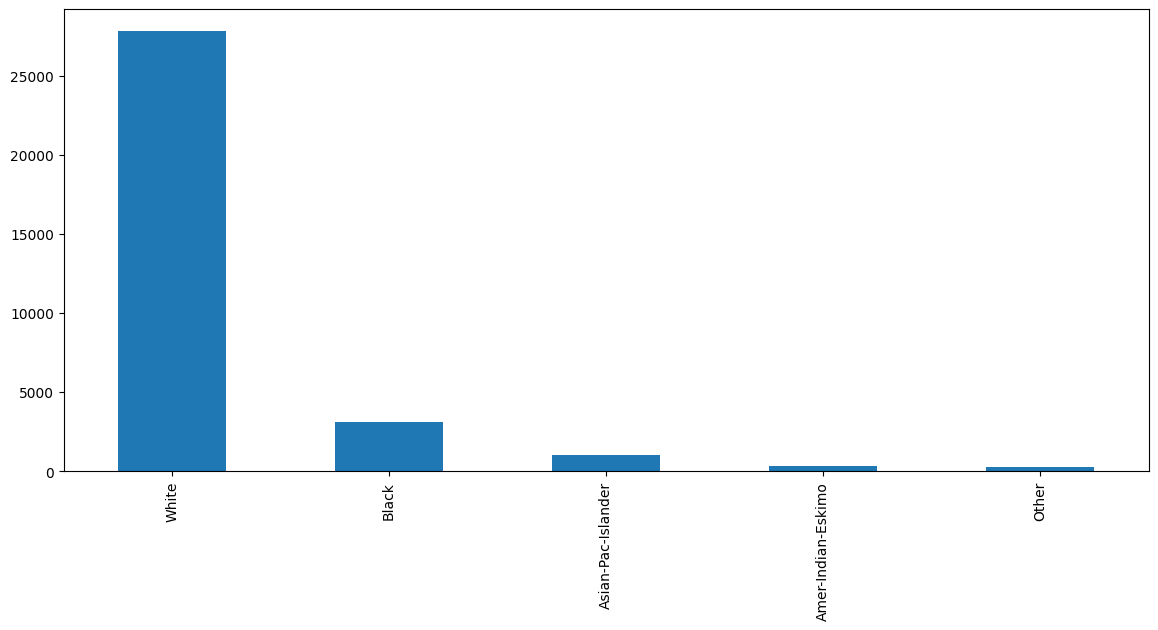

In [13]:
df['race'].value_counts().plot(kind='bar',figsize=(14,6))

# 2 What is the average age of men?

In [18]:
average_age_men = round(df[df.sex == 'Male'].age.mean(),2)

print("Average age of men:", average_age_men)

Average age of men: 39.43


# 3 What is the percentage of people who have a Bachelor's degree?

In [34]:
percentage_bachelors = round((df.education.value_counts(normalize=True).Bachelors)*100,2)

print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")

Percentage with Bachelors degrees: 16.45%


<Axes: ylabel='education'>

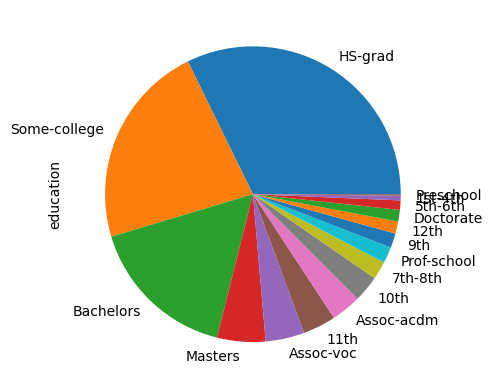

In [35]:
df['education'].value_counts().plot(kind='pie')

# 4 What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [44]:
# First, I create mask, which extract rows with 'Bachelors', 'Masters', ans 'Doctorate'
higher_education = ( (df['education'] == 'Doctorate')
                    | (df['education'] == 'Bachelors')
                    | (df['education'] == 'Masters'))

# I used this mask and then I did value_counts(with normalize)
# Next I chose only row with index '>50K' and rounded its value
higher_education_rich = round((
            df[higher_education].salary.value_counts(normalize=True)['>50K']
                )*100 ,2)

print(f"Percentage of people with higher education that earn >50K: {higher_education_rich}%")

Percentage of people with higher education that earn >50K: 46.54%


# 5 What percentage of people without advanced education make more than 50K?

In [45]:
# Lower education is just not higher education
lower_education = ~higher_education

# The same as for higher education
lower_education_rich = round((
            df[lower_education].salary.value_counts(normalize=True)['>50K']
                )*100 ,2)

print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")

Percentage without higher education that earn >50K: 17.37%


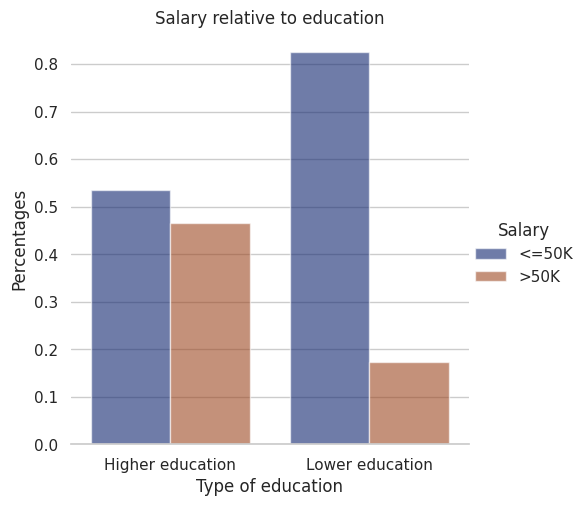

In [43]:
# Seaborn

# For this visualisation I had to rebuild dataset to other form

# First let's do a copy
data_visualisation = df.copy()

# In new dataset we add column 'type-education'
# with values "Higher education" and "Lower education"
# based on a column 'education'
data_visualisation['type-education'] = np.where(
    ((data_visualisation['education'] == "Doctorate")
    | (data_visualisation['education'] == "Bachelors")
    | (data_visualisation['education'] == "Masters")),
    "Higher education",
    "Lower education"
)

# Abracadabra
data_visualisation = (data_visualisation
    # We group dataset by column 'type-education'
    .groupby('type-education')['salary']
    # At the same time, we count values with normalize
    # In column 'salary', for each group
    .value_counts(normalize=True)
    # Now we have small grouped dataset with values from value_counts
    # But now it will be difficult to visualize our dataset
    # So we unsack column salary into two columns
    .unstack()
    # And then back to form with one column salary
    # But now, values from value_counts is other column
    .melt(ignore_index=False)
    # And now we can reset index to have columns
    # With salary and type education
    # Insted of Multiindex with them
    .reset_index())

# Finally we can create chart
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=data_visualisation,
    x='type-education',
    y='value',
    hue='salary',
    kind='bar',
    palette="dark",
    alpha=.6,
)

g.despine(left=True)
g.set(title='Salary relative to education')
g.set_axis_labels("Type of education", "Percentages")
g.legend.set_title("Salary")

plt.show()

# 6 What is the minimum number of hours a person works per week (hours-per-week feature)?

In [52]:
min_work_hours=df['hours-per-week'].min()
min_work_hours

1

# 7 What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [53]:
# First, I extract rows with the minimum number of hours
num_min_workers = df[df['hours-per-week'] == min_work_hours]

rich_percentage = round((num_min_workers.salary.value_counts(normalize=True)['>50K'])*100,2)

print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")

Percentage of rich among those who work fewest hours: 10.0%


# 8 What country has the highest percentage of people that earn >50K?

In [57]:
highest_earning_country = (df.groupby('native-country')['salary'].value_counts(normalize=True)[:,'>50K']    .sort_values(ascending=False).index[0])

print("Country with highest percentage of rich:", highest_earning_country)

Country with highest percentage of rich: Iran


# 9 What is the percentage of rich people in above country?

In [58]:
highest_earning_country_percentage = (round((df
    .groupby('native-country')['salary']
    .value_counts(normalize=True)[:,'>50K']
    .sort_values(ascending=False)[0])*100,2))

print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")

Highest percentage of rich people in country: 41.86%


# 10 Identify the most popular occupation for those who earn >50K in India.

In [60]:
# Create a mask to choose only rows about people from India which earns >50K
mask = (df['salary'] == '>50K') & (df['native-country'] == 'India')

# Use mask to dataset
top_IN_occupation = (df[mask]['occupation']
    # Count values in column 'occupation'
    .value_counts()[:1]
    # Return occupation with highest number
    .index[0])

print("Top occupations in India:", top_IN_occupation)

Top occupations in India: Prof-specialty
